## Model Result Analysis

In [1]:
!pip install -qq ipython-autotime

%unload_ext autotime

The autotime extension is not loaded.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from argparse import Namespace
from collections import Counter
sns.set(style="darkgrid")
import os
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

In [3]:
def get_analysis(gold_csv,pred_csv,test_set_df,subtask):
    
    """
    Get the Confusion Matrix to analyze the model  
    ---------------------------------------------
    
    Parameters:
        gold_csv: Location of gold label csv file
        pred_csv: Location of csv with predicted labels
        test_set_df: Df containing the 'ID' and corresponding text
        subtask: either 'a' or 'b'

    Return:
        analysis_df: dataframe containing the columns  Text, True labels as 'true'
                     predicted labels as 'pred'
        cross_tab: A pandas crosstab as confusion matrix
    """
    
    gold_df = pd.read_csv(gold_csv)
    preds_df = pd.read_csv(pred_csv)
    preds_df.rename(
        columns={'Label':'pred'},
        inplace=True,
    )
    temp = pd.merge(
        test_set_df,
        gold_df, on='ID'
    )
    temp.rename(
        columns={f'Sub-task {subtask.upper()}': 'true'},
        inplace=True
    )
    analysis_df = pd.merge(temp, preds_df, on='ID')
    cross_tab = pd.crosstab(
        # y true
        analysis_df.true ,  
        # y pred
        analysis_df.pred , 
        rownames=['True'], colnames=['Predicted'], margins=True
    )
    return analysis_df, cross_tab

In [4]:
def print_samples(label,analysis_df,mistakes=True,num_samples=5):
    
    """
    Print the correct and incorrect samples for analysis for 
    ----------------------------------------------------

    Parameters:
      label       :  select the particular class/label in the data
      analysis_df :  dataframe containing the Truth values and Model Predictions
      mistakes    :  if True(default) selects the incorrect classifications
                     else selects the correct one's
      num_samples :  count of samples to print

    """
    
    with pd.option_context('display.max_colwidth', -1): 
        # print misclassfied text data
        if mistakes: 
            df = analysis_df[analysis_df.true != analysis_df.pred]
            [['Text','true','pred']]
        # print correctly classified text data
        else:
            df = analysis_df[analysis_df.true == analysis_df.pred]
            [['Text','true','pred']]
            
        return df[df['true']==label][:num_samples]

In [5]:
def get_confusion_matrix(df):

  """
  Util function to get confusion matrix of the model on test set
  """
  
  with sns.plotting_context('notebook',font_scale=1.6):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        df,
        annot=True,
        fmt="d", 
        cmap= 'Blues',
        annot_kws={"size": 20},
    )

In [7]:
Test_Set = pd.read_csv('trac2_hin_test.csv')

##Confusion Matrix

### Task A- Aggresive text Classification

#### Logistic Regression

- LR with CV vect 

In [56]:
lr_hin_a_analysis_df, lr_hin_a_crosstab = get_analysis(
    gold_csv = 'trac2_hin_gold_a.csv',
    pred_csv = 'trac2_hin_lr_tfidf_preds_a.csv',
    test_set_df =Test_Set,
    subtask = 'a',
)

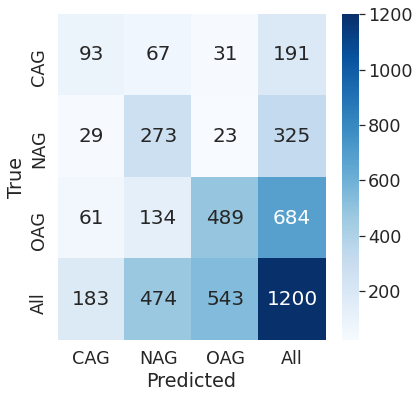

In [57]:
get_confusion_matrix(lr_hin_a_crosstab)

In [84]:
print(classification_report(
    y_true = lr_hin_a_analysis_df.true,
    y_pred = lr_hin_a_analysis_df.pred,
))

              precision    recall  f1-score   support

         CAG       0.51      0.49      0.50       191
         NAG       0.58      0.84      0.68       325
         OAG       0.90      0.71      0.80       684

    accuracy                           0.71      1200
   macro avg       0.66      0.68      0.66      1200
weighted avg       0.75      0.71      0.72      1200



- LR model most confused with 
  
  - NAG (predict) and OAG (true) [134 misclassified]
  - NAG (predict) and CAG (true) [67 misclassified] 
  - CAG (predict) and OAG (true) [61 misclassified]

#### SVC
- SVC with linear kernel,C=2.0,tfidf vect with ngram(1,2)

In [58]:
svc_hin_a_analysis_df, svc_hin_a_crosstab = get_analysis(
    gold_csv = 'trac2_hin_gold_a.csv',
    pred_csv = 'trac2_hin_svc_preds_a.csv',
    test_set_df =Test_Set,
    subtask = 'a',
)

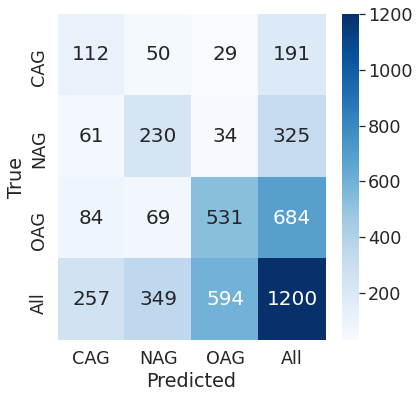

In [59]:
get_confusion_matrix(svc_hin_a_crosstab)

In [83]:
print(classification_report(
    y_true = svc_hin_a_analysis_df.true,
    y_pred = svc_hin_a_analysis_df.pred,
))

              precision    recall  f1-score   support

         CAG       0.44      0.59      0.50       191
         NAG       0.66      0.71      0.68       325
         OAG       0.89      0.78      0.83       684

    accuracy                           0.73      1200
   macro avg       0.66      0.69      0.67      1200
weighted avg       0.76      0.73      0.74      1200



- SVC model most confused with 
  
  - CAG (predict) and OAG (true) [84 misclassifications]
  - NAG (predict) and OAG (true) [69 misclassifications]
  - CAG (predict) and NAG (true) [61 misclassifications]

### Task B - Gendered Text Classification

#### Logistic Regression
- LR with CV vect

In [60]:
lr_hin_b_analysis_df, lr_hin_b_crosstab = get_analysis(
    gold_csv = 'trac2_hin_gold_b.csv',
    pred_csv = 'trac2_hin_lr_cv_preds_b.csv',
    test_set_df =Test_Set,
    subtask = 'b',
)

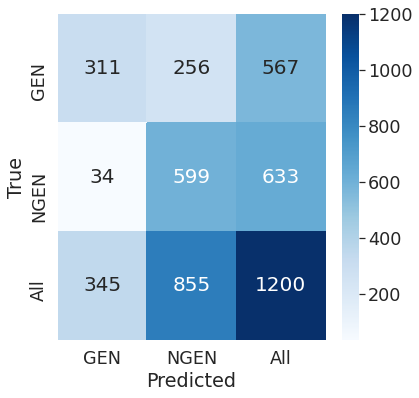

In [61]:
get_confusion_matrix(lr_hin_b_crosstab)

In [82]:
print(classification_report(
    y_true = lr_hin_b_analysis_df.true,
    y_pred = lr_hin_b_analysis_df.pred,
))

              precision    recall  f1-score   support

         GEN       0.90      0.55      0.68       567
        NGEN       0.70      0.95      0.81       633

    accuracy                           0.76      1200
   macro avg       0.80      0.75      0.74      1200
weighted avg       0.80      0.76      0.75      1200



- LR model most confused with
 - NGEN (predict) and GEN (truth)

- High % of correct predictions in Majority Class (NGEN)

#### BERT 
- pretrained on hi-en code mixed data

In [62]:
bert_hin_b_analysis_df, bert_hin_b_crosstab = get_analysis(
    gold_csv = 'trac2_hin_gold_b.csv',
    pred_csv = 'trac2_hin_BERT_preds_b2.csv',
    test_set_df =Test_Set,
    subtask = 'b',
)

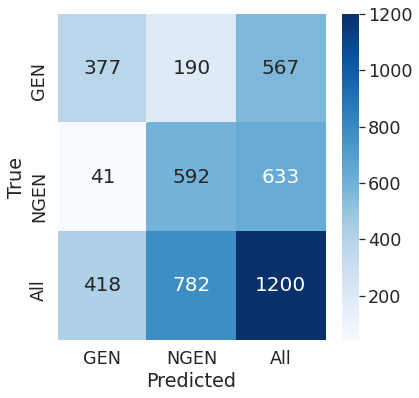

In [63]:
get_confusion_matrix(bert_hin_b_crosstab)

In [81]:
print(classification_report(
    y_true = bert_hin_b_analysis_df.true,
    y_pred = bert_hin_b_analysis_df.pred,
))

              precision    recall  f1-score   support

         GEN       0.90      0.66      0.77       567
        NGEN       0.76      0.94      0.84       633

    accuracy                           0.81      1200
   macro avg       0.83      0.80      0.80      1200
weighted avg       0.83      0.81      0.80      1200



- BERT model most confused with
 - NGEN (predict) and GEN (truth)

- Better predictions of minority class (GEN) compared to baselines

## Correct and Incorrect Predictions

### Task A

#### SVC

In [66]:
svc_hin_a_analysis_df.head()

,ID,Text,true,Unnamed: 0,pred
0,C52.17,ko,NAG,0,OAG
1,C52.39,ladkiyon video,NAG,1,NAG
2,C52.73,ki video gahrep,NAG,2,NAG
3,C60.3,o sadharon video bhai,NAG,3,NAG
4,C60.43,ba bhai kyea bola tum moza aaa giea 😌😌😌😂😂😂,NAG,4,NAG


In [73]:
svc_hin_a_analysis_df = svc_hin_a_analysis_df.iloc[:,[0,1,2,4]]

#### Correct Predictions

In [74]:
correct_NAG = print_samples(
    analysis_df = svc_hin_a_analysis_df,
    mistakes = False,
    num_samples =5,
    label = 'NAG'
)
correct_NAG

,ID,Text,true,pred
1,C52.39,ladkiyon video,NAG,NAG
2,C52.73,ki video gahrep,NAG,NAG
3,C60.3,o sadharon video bhai,NAG,NAG
4,C60.43,ba bhai kyea bola tum moza aaa giea 😌😌😌😂😂😂,NAG,NAG
5,C60.72,wah bhai jaliye dili,NAG,NAG


In [75]:
correct_OAG = print_samples(
    analysis_df = svc_hin_a_analysis_df,
    mistakes = False,
    num_samples =5,
    label = 'OAG'
)
correct_OAG

,ID,Text,true,pred
17,C60.500,chutiya saale,OAG,OAG
22,C60.708,"sare milke pagal banarahahay, bainchod",OAG,OAG
23,C60.732,ranu mondol sali barochodi sali haram jadi bakar chodhi 😡😡😡😡😡😡😡sali metha\nbadi...,OAG,OAG
29,C18.8,film daal de gand mara raha h,OAG,OAG
37,C18.53.1,@bikram singh abe gandiye padna nhi aata kya....me gaand k neeche deta\nhu...khaega,OAG,OAG


In [76]:
correct_CAG = print_samples(
    analysis_df = svc_hin_a_analysis_df,
    mistakes = False,
    num_samples =5,
    label = 'CAG'
)
correct_CAG

,ID,Text,true,pred
59,C24.73,sab faltu hain rape hua h tabhi bolgr,CAG,CAG
60,C24.78,"किसीको कोई हक नहीं की वो किसी और की जिंदगी बरबाद करें, चाहे वह लड़की हो या फिर\nलड़का हो 1लड़के हमेशा गलत नहीं होते 1 पर गलत इल्जाम लगाकर उन्हें गलत साबित\nकिया जाता है 1 सबको इज्जत देनी चाहिए 1 कानून का गलत इस्तेमाल नहीं करना चाहिए 1",CAG,CAG
69,C24.110,ठीक ऐसेही हमारे देश के नौजवानों के साथ साथ हमारे देश के संतों पर भी इस तरह के\nझुठे केस लगाकर उनको सालों से जेल में रखा जा रहा है....,CAG,CAG
84,C24.194,after this trailer- \nnobody: \nliterally nobody: \nle some fake feminists - ye sab bakwas hai is movie ko ban karo..,CAG,CAG
96,C24.286,"ladki bechari ban kar kuch bhi kar sakti hai, or ladko ko to bechara banane ka\nhaq hi nahi hai",CAG,CAG


- 96,97

#### Incorrect Predictions

- NAG class

In [77]:
incorrect_nag = print_samples(
    analysis_df = svc_hin_a_analysis_df,
    mistakes = True,
    num_samples=5,
    label = 'NAG'
)
incorrect_nag

,ID,Text,true,pred
0,C52.17,ko,NAG,OAG
45,C18.71.1,feminist nahi hai na isliye humble.,NAG,CAG
65,C24.101,koi toh hai jo ladko ka bhi soch rha hai varna hamari kya life hai jab dekho\ntab daar daar ke rehna padta hai ladkiyon se parks me public places me ki khi\nkoi hamare par jootha iljaam na lga de .,NAG,CAG
88,C24.214,in fake cases ki wajha se hi asal m jiske sath rape hota he unko insaf nhi\nmilta kyoki police fake cases m jo busy hoti h jo ki bahot zada hote he\ncompare to real,NAG,CAG
89,C24.219,"thank u for making this... \n \n \nmera ek sawal hai ek couple relationship mai dono ne agree hoke sex kra dono\nne wo personal space n time enjoy kiya... \n \nand future mai kisi waje se shadi nhi ho pa rahi na ladka chayta h ki shadi na\nho na ladki par aysa ho raha h, so to is baat pe ek ladki kyse ye khe sakti h\nk he rape pe. \n \nsex to dono ne kiya na dono ne apni marzi se kiya f...",NAG,CAG


- 88,why is that NAG (true)

- OAG class

In [78]:
incorrect_oag = print_samples(
    analysis_df = svc_hin_a_analysis_df,
    mistakes = True,
    num_samples = 5,
    label = 'OAG'
)
incorrect_oag

,ID,Text,true,pred
55,C24.45,shame on you bitches and indian justice system... jo ldkiya fake rape case\nkrti h unko to fansi honi chahiye... real rapist ko turant fansi do lekin fake\nrape case krne wali ldkiyo pr bhi case honi chahiye inko.,OAG,CAG
57,C24.59,"jab sach me rape hota he toh rapist ki arrest nei karte,lenin jhuthe case me\ninnocent ko sajja dete he.... that is indian law...",OAG,CAG
63,C24.92,itna hi khahungi ki har bar ladka ka galti nhi hota ajkl toh ladki hi faltu\nhai mein bhi ek ladki hu lekin kuch ase harami madchood ladki jnti hu jo b.f\nbnate hai pessa urake phir dusre ke saat sadhi kar lati hai ase ladkiya\n******** kesi hai woh sblog jnlo agr b.f ke sat sadhi nhi krni toh pyaar kyu\nkrte ho motherfucker i think it is the girl who gives chance to boys lol 😈😭😫😅😂,OAG,CAG
68,C24.104.4,acha ta aa chus le mera ek baar,OAG,NAG
72,C24.137,nirbhaya kaand un ladkiyon ke saath hona chaiye jo false rape case me ladko ko\nfasati hai. saali randiyan.,OAG,NAG


- CAG class

In [79]:
incorrect_cag = print_samples(
    analysis_df = svc_hin_a_analysis_df,
    mistakes=True,
    num_samples =5,
    label ='CAG'
)
incorrect_cag

,ID,Text,true,pred
28,C18.6,bollywood waly pagal hain varun dhawan jese overactors ko movies de dety hain\nlekin akshay khanna jesy realistic actors k talent ko use ni krty. \nrespect from pakistan,CAG,OAG
33,C18.30.1,sabit naahi hua.aur kon bola kulbhushan jadhav terrorist hey?,CAG,NAG
50,C24.6,shatir aurton se saawadh rahe satark rahe... \n **janheet mein jaari**,CAG,OAG
54,C24.27,महिलाओं के लिए महिला आयोग और पुरुषों के लिए कुछ नहीं बस ढकोसला,CAG,NAG
64,C24.95,"yad rakhiye in fake cases me bhi fansane wale kisi ke bete ,kisi bhai, kisi ka\nhusband hote hai .....",CAG,NAG


### Task B

 Model : BERT (pretrained on hi (roman)-en )

In [80]:
bert_hin_b_analysis_df.head()

,ID,Text,true,Unnamed: 0,pred
0,C52.17,ko,NGEN,0,NGEN
1,C52.39,ladkiyon video,NGEN,1,NGEN
2,C52.73,ki video gahrep,NGEN,2,NGEN
3,C60.3,o sadharon video bhai,NGEN,3,NGEN
4,C60.43,ba bhai kyea bola tum moza aaa giea 😌😌😌😂😂😂,NGEN,4,NGEN


In [85]:
bert_hin_b_analysis_df = bert_hin_b_analysis_df.iloc[:,[0,1,2,4]]

#### Correct Predictions

- NGEN

In [90]:
correct_ngen = print_samples(
    analysis_df = bert_hin_b_analysis_df,
    mistakes = False,
    num_samples =5,
    label = 'NGEN'
)
correct_ngen

,ID,Text,true,pred
0,C52.17,ko,NGEN,NGEN
1,C52.39,ladkiyon video,NGEN,NGEN
2,C52.73,ki video gahrep,NGEN,NGEN
3,C60.3,o sadharon video bhai,NGEN,NGEN
4,C60.43,ba bhai kyea bola tum moza aaa giea 😌😌😌😂😂😂,NGEN,NGEN


- GEN

In [91]:
correct_gen = print_samples(
    analysis_df = bert_hin_b_analysis_df,
    mistakes = False,
    num_samples =5,
    label = 'GEN'
)
correct_gen

,ID,Text,true,pred
38,C18.53.2,tere chahne se duniya chal rhi he kya madarchod,GEN,GEN
62,C24.91,ye mc dislike krne waale...,GEN,GEN
68,C24.104.4,acha ta aa chus le mera ek baar,GEN,GEN
72,C24.137,nirbhaya kaand un ladkiyon ke saath hona chaiye jo false rape case me ladko ko\nfasati hai. saali randiyan.,GEN,GEN
74,C24.155.3,but feminism chutiyapa he \naur use supportkarne wale madarchod he,GEN,GEN


#### Incorrect Predictions


- GEN class

In [92]:
incorrect_gen = print_samples(
    analysis_df = bert_hin_b_analysis_df,
    mistakes = True,
    num_samples =5,
    label = 'GEN'
)
incorrect_gen

,ID,Text,true,pred
23,C60.732,ranu mondol sali barochodi sali haram jadi bakar chodhi 😡😡😡😡😡😡😡sali metha\nbadi...,GEN,NGEN
50,C24.6,shatir aurton se saawadh rahe satark rahe... \n **janheet mein jaari**,GEN,NGEN
51,C24.16,awesome bhai 90 percent to fake case hote rape k or ldke ki puri zindgi barbad\nho jaati h,GEN,NGEN
55,C24.45,shame on you bitches and indian justice system... jo ldkiya fake rape case\nkrti h unko to fansi honi chahiye... real rapist ko turant fansi do lekin fake\nrape case krne wali ldkiyo pr bhi case honi chahiye inko.,GEN,NGEN
56,C24.54,asi juti ladkiyo ko bich chorahe me goli marna cbahiye,GEN,NGEN


- NGEN class

In [93]:
incorrect_ngen = print_samples(
    analysis_df = bert_hin_b_analysis_df,
    mistakes = True,
    num_samples =5,
    label = 'NGEN'
)
incorrect_ngen

,ID,Text,true,pred
37,C18.53.1,@bikram singh abe gandiye padna nhi aata kya....me gaand k neeche deta\nhu...khaega,NGEN,GEN
113,C24.387,"about amity university case... a lady student filed fake harrassment case so\nthat she can hide her bad doings... ""are bc kal humne jin bndo ki pitvaya tha\nvo case kr skte h, chal jldi hum hi harrassment ka case kr aate h""👌🏼",NGEN,GEN
126,C24.468,i request all women please aisa mt kia kro innocent logo k sath bcoz apke krn\nlog sach p belive krna bnd kr dege please dont do this 🙏🙏🙏,NGEN,GEN
131,C24.503,shonee ji aapsay pehlay bhi meri ek baar baat hui thi ph par aab mien 4 case\ndv divorce jurisdiction or hc say jeet kar aaya hu aapnay \nbalbutay par lawyer kay nahi,NGEN,GEN
141,C24.558,sons tho poorey gaandu hein.. awaarey hein.. protection ke layak nahin..hein\nyeh log. hats off to indian constitution,NGEN,GEN
